## Итоговый проект

Команда:

- **Федоров Дмитрий Андреевич**

- **Александров Егор Александрович**

**Тема итогового проекта**: Прогнозирование энергетического производства и потребления с использованием методов машинного обучения.

Для удобства прикладываем [ссылку](https://drive.google.com/drive/folders/115sHtjOFsF8IKq_uB9abuP4canU6Wx0y?usp=sharing) на папку с датасетом.

В дальнейшем используем *random_state = 55*

### Ход работы
1. Постановка задачи
2. Описание набора данных
3. Исследовательский анализ данных (EDA)
4. Выбор и разработка бейзлайн-модели
5. Оценка и интерпретация результатов
6. Выбор и разработка более сложной модели с подбором гиперпараметров
7. Оценка и интерпретация результатов
8. Документирование этапов проекта и подготовка отчетности

### Постановка задачи

#### Бизнес-постановка задачи
Цель нашего проекта — разработать модель прогнозирования производства энергии для стран по всему миру. Основная задача заключается в том, чтобы предсказать объемы производства энергии на ближайшие годы, используя исторические данные и экономические показатели, такие как ВВП, население и типы энергоресурсов. Этот прогноз поможет энергетическим компаниям и государственным органам лучше планировать и распределять ресурсы, оптимизировать производственные мощности и минимизировать избыточные затраты.

Прогнозирование производства энергии также имеет важное значение для разработки стратегий устойчивого развития. С учетом роста потребности в экологически чистой энергии и сокращения выбросов углерода, наша модель позволит принимать обоснованные решения относительно инвестиций в возобновляемые источники энергии и модернизации существующих энергетических систем. Таким образом, этот проект способствует более эффективному и устойчивому управлению энергетическими ресурсами, что в конечном итоге приведет к стабильному экономическому росту и улучшению качества жизни.

Кроме того, с развитием технологий искусственного интеллекта и увеличением числа вычислительных центров, спрос на электроэнергию будет стремительно расти. Внедрение ИИ в различные отрасли экономики требует значительных энергетических ресурсов для обработки данных и обучения моделей. Согласно отчету Международного энергетического агентства [(IEA)](https://www.eia.gov/pressroom/releases/press542.php), к 2050 году спрос на электроэнергию вырастет от 16% до 57% по сравнению с 2022 годом со среднегодовым темпом роста от 0.5% до 1.6%, и значительная часть этого роста будет связана с центрами обработки данных и цифровыми технологиями. Наши прогнозы помогут заранее подготовиться к этому приросту потребления электроэнергии, обеспечив необходимое количество производственных мощностей и способствуя стабильному развитию высокотехнологичных секторов экономики.

#### ML-постановка задачи

Цель работы - построить модель, которая предсказывает ежегодное производство энергии на основе исторических данных и различных факторов.

#### Описание данных

В рамках решения задачи прогнозирования ежегодного производства энергии мы используем датасет от [Our World In Data](https://github.com/owid/energy-data). Это датасет, который их команда собирает из различных источников и регулярно обновляет, что делает его отличным вариантом сводных данных для решения ML-задач. Набор данных содержит 127 переменных, охватывающих различные аспекты производства, потребления и экономических показателей по различным странам мира с 1965 по 2023 годы, таким образом представляя из себя панельные данные. Эти переменные можно разделить на следующие основные категории:

1. Географические и временные данные 

- country: Страна - Географическое расположение.
- year: Год - Год наблюдения.

2. Демографические данные

- population: Население - Население по странам, доступное для всего периода.

3. Производство энергии *(приведена часть примеров)*

- coal_production: Производство угля.
- oil_production: Производство нефти.

4. Потребление энергии *(приведена часть примеров)*

- coal_consumption: Потребление угля.
- oil_consumption: Потребление нефти.

5. Экономические и социальные показатели *(приведена часть примеров)*

- gdp: Валовой внутренний продукт (ВВП) - Эта информация приведена в международных долларах по ценам 2011 года.
- net_elec_imports: Импорт - Экспорт (чистый импорт) энергии.
- electricity_generation: Генерация электроэнергии.
- energy_prices: Цены на энергию.

6. Экологические данные *(приведена часть примеров)*

- greenhouse_gas_emissions: Выбросы углерода.

7. Прочие данные *(приведена часть примеров)*

- energy_access: Доступ к энергии (доля населения с доступом к электроэнергии).
- energy_efficiency: Энергоэффективность.
- energy_security: Энергетическая безопасность.

Для ознакомления с полным списком переменных и их расшифровкой можно обратиться к [codebook](https://github.com/owid/energy-data/blob/master/owid-energy-codebook.csv), составленному авторами датасета. 

#### Потенциальные проблемы и ограничения

1. **Качество и полнота данных**

**Описание:** Исторические данные могут содержать пропуски, выбросы или ошибки. Неполные или неточные данные могут затруднить обучение модели и снизить точность прогнозов.

**Возможные решения:**
- Применение методов обработки пропусков, таких как интерполяция или использование моделей для восстановления данных.
- Удаление или корректировка выбросов.
- Использование различных источников данных для повышения полноты информации.

2. **Высокая корреляция между признаками**

**Описание:** Некоторые признаки могут быть сильно коррелированы друг с другом, что может привести к проблемам мультиколлинеарности и затруднить интерпретацию модели.

**Возможные решения:**
- Проведение корреляционного анализа и удаление избыточных признаков.
- Применение методов уменьшения размерности, таких как PCA (анализ главных компонентов).

3. **Сезонные и долгосрочные тренды**

**Описание:** Производство и потребление энергии могут подвержены сезонным колебаниям и долгосрочным трендам, которые необходимо учитывать при прогнозировании.
**Возможные решения:**
- Включение сезонных признаков в модель.
- Использование моделей, учитывающих временные зависимости, таких как ARIMA, Prophet или LSTM.

4. **Влияние внешних факторов**

**Описание:** Производство энергии может зависеть от внешних факторов, таких как экономические кризисы, политическая нестабильность или природные катастрофы, которые трудно предсказать.
**Возможные решения:**
- Включение макроэкономических и геополитических показателей в модель.
- Разработка сценариев прогнозирования для учета различных внешних условий.

#### Выбор метрик

Сразу же обсудим, какие метрики можно будет использовать для оценки качества моделей, их преимущества и ограничения.

1. **Среднеквадратичная ошибка (Mean Squared Error, MSE)**

**Описание:** MSE измеряет среднюю величину квадрата ошибки между прогнозируемыми и фактическими значениями.

**Преимущества:**
- Чувствительна к большим ошибкам, так как квадратичные ошибки увеличиваются.
- Хорошо подходит для моделей, где важны большие отклонения.

**Ограничения:**
- Метрические значения трудно интерпретировать из-за квадратичного масштаба.
- Может быть чрезмерно чувствительна к выбросам.

2. **Средняя абсолютная ошибка (Mean Absolute Error, MAE)**

**Описание:** MAE измеряет среднюю величину абсолютных ошибок между прогнозируемыми и фактическими значениями.

**Преимущества:**
- Легко интерпретировать, так как ошибка выражена в тех же единицах, что и данные.
- Менее чувствительна к выбросам по сравнению с MSE.

**Ограничения:**
- Не учитывает направление ошибок.

3. **Среднеквадратическая ошибка корня (Root Mean Squared Error, RMSE)**

**Описание:** RMSE является корнем из MSE и измеряет среднюю величину ошибки.

**Преимущества:**
- Легче интерпретировать по сравнению с MSE, так как выражена в тех же единицах, что и данные.
- Сохраняет чувствительность к большим ошибкам.

**Ограничения:**
- Все еще чувствительна к выбросам.

4. **Средняя абсолютная процентная ошибка (Mean Absolute Percentage Error, MAPE)**

**Описание:** MAPE измеряет среднюю абсолютную процентную ошибку между прогнозируемыми и фактическими значениями.

**Преимущества:**
- Выражает ошибку в процентах, что облегчает интерпретацию.
- Позволяет сравнивать ошибки между разными наборами данных.

**Ограничения:**
- Не работает с данными, которые содержат нулевые значения.
- Может быть искажена, если фактические значения очень малы.

### Исследовательский анализ данных (EDA)


Несколько слов о том, что будем делать в данном разделе:

1. Изучим датасет
- Рассмотрим типы данных переменных;
- Изучим статистические характеристики переменных;
- Узнаем, повезло ли нам получить датасет без пропущенных значений

2. Посмотрим на распределение данных
- Рассмотрим производство и потребление энергии по основным категория

3. Выделим ключевые тенденции
- Рассмотрим основные тенденции и изменения в производстве и потреблении энергии по категориям

4. Проведем корреляционный анализ

5. Посмотрим на временные тренды и сезонные паттерны

6. Проанализируем выбросы

7. Проанализируем лаговые переменные
- Попробуем выявить временные зависимости и автокорреляцию в данных

8. Делаем выводы из EDA
9. Приступаем к разработке модели

In [1]:
import pandas as pd

# Загрузим данные (либо используем csv-шник с Google Drive)
data_url = "https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv"
df = pd.read_csv(data_url)

In [2]:
# Посмотрим первые строки
print(df.head())

         country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  ...  solar_share_elec  solar_share_energy  \
0      

In [3]:
# Выведем основную информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21812 entries, 0 to 21811
Columns: 129 entries, country to wind_share_energy
dtypes: float64(126), int64(1), object(2)
memory usage: 21.5+ MB
None


In [4]:
# Выведем описание данных
print(df.describe())
# print(df['oil_production'].describe()) 
# print(df['gas_production'].describe())  
# print(df['coal_consumption'].describe())  
# print(df['oil_consumption'].describe())  

               year    population           gdp  biofuel_cons_change_pct  \
count  21812.000000  1.844700e+04  1.177500e+04              1806.000000   
mean    1974.195718  1.054051e+08  4.260596e+11                45.489759   
std       35.342860  4.665375e+08  3.508591e+12               266.131064   
min     1900.000000  1.833000e+03  1.642060e+08              -100.000000   
25%     1946.000000  1.714291e+06  1.438637e+10                -0.500000   
50%     1984.000000  6.998022e+06  4.393385e+10                 8.189000   
75%     2004.000000  2.571993e+07  1.830838e+11                26.550000   
max     2023.000000  8.045311e+09  1.301126e+14              5659.328000   

       biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
count              2796.000000              2400.000000          2876.000000   
mean                  2.867027               136.600523            39.082519   
std                  10.692769               261.757657           116.30766

In [5]:
# Проверим на наличие пропусков
print(df.isnull().sum())

country                       0
year                          0
iso_code                   5000
population                 3365
gdp                       10037
                          ...  
wind_elec_per_capita      14534
wind_electricity          13578
wind_energy_per_capita    17659
wind_share_elec           14615
wind_share_energy         17619
Length: 129, dtype: int64


В данных обнаружено множество пропусков. Об этом мы размышляли ранее в разделе с потенциальными проблемами и ограничениями. Причинами подобного являния являются сложности со сбором данных для некоторых стран и период наблюдений (Изначально датасет охватывает записи с 1900 года, но в дальнейшем мы ограничим их с 1965, поскольку в своей аналитике Our World In Data используем этот год как начало отсчета).

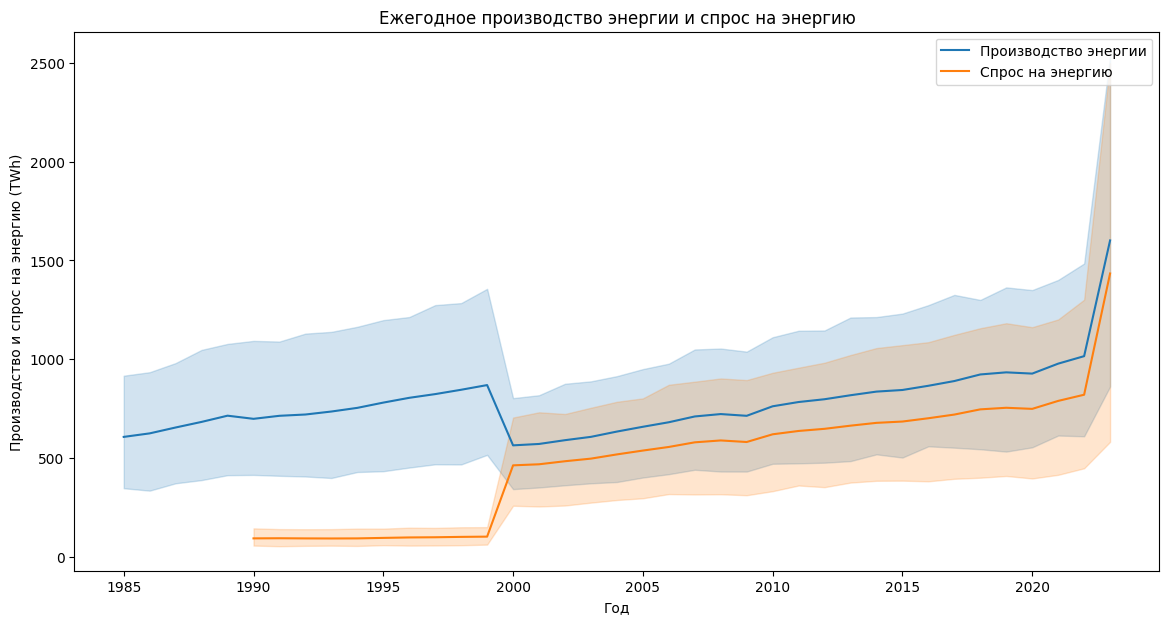

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='year', y='electricity_generation', label='Производство энергии')
sns.lineplot(data=df, x='year', y='electricity_demand', label='Спрос на энергию')
plt.title('Ежегодное производство энергии и спрос на энергию')
plt.xlabel('Год')
plt.ylabel('Производство и спрос на энергию (TWh)')
plt.legend()
plt.show()


Оба показателя демонстрируют общий тренд роста на протяжении рассматриваемого периода. На графике видны резкие изменения в значениях, особенно в конце 1990-х и начале 2000-х годов, что может быть связано с изменениями в политике, экономике или технологическом прогрессе. Что интересно, в конце 1990-х и начале 2000-х показатели демонстрируют противоположные тренды, что может быть связано с несколькими факторами:

- В конце 90-х и начале 2000-х многие страные переживали экономические кризисы, что могло значительно повлиять на производство энергии. Некоторые страны, в которых началась формироваться рыночная экономика, могли испытывать изменения в производственных мощностях и инфраструктуре
- В то же время начинается активный рост информационных технологий (больше серверов, больше дата-центров и т.д.). Ускорение урбанизации и роста населения также могли стать фактором повышения спроса на энергию.
- Возможно, происходит переход к новым источникам энергии, закрытию старых, неэффективных энергетических объектов. 

В последние же годы наблюдается значительный рост производства энергии и спроса на энергию.

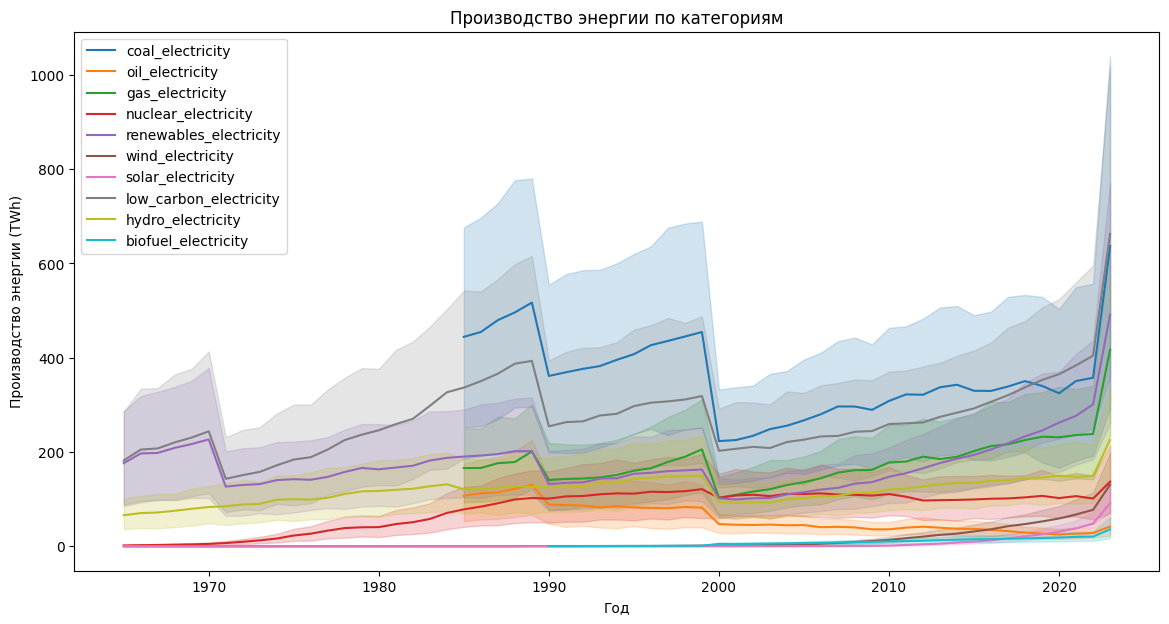

In [7]:
energy_types = ['coal_electricity', 'oil_electricity', 'gas_electricity', 'nuclear_electricity', 'renewables_electricity', 'wind_electricity', 'solar_electricity', 'low_carbon_electricity', 'hydro_electricity', 'biofuel_electricity']

plt.figure(figsize=(14, 7))
for energy_type in energy_types:
    sns.lineplot(data=df, x='year', y=energy_type, label=energy_type)
plt.title('Производство энергии по категориям')
plt.xlabel('Год')
plt.ylabel('Производство энергии (TWh)')
plt.legend()
plt.show()

График показывает динамику производства энергии по различным категориям с 1965 по 2022 год. С 1965 года наблюдается устойчивый рост производства энергии во всех категориях. В конце 90-х и начале 2000-х годов произошло значительное изменение в производстве энергии, особенно заметное для угля и нефти. С начала 2000-х годов производство энергии из возобновляемых источников, таких как ветер и солнце, начало заметно увеличиваться, что мы и предполагали ранее. Наблюдается общее снижение производства электроэнергии из угля с ростом использования возобновляемых источников энергии. В последние годы производство энергии, особенно из низкоуглеродных и возобновляемых источников, резко возросло.

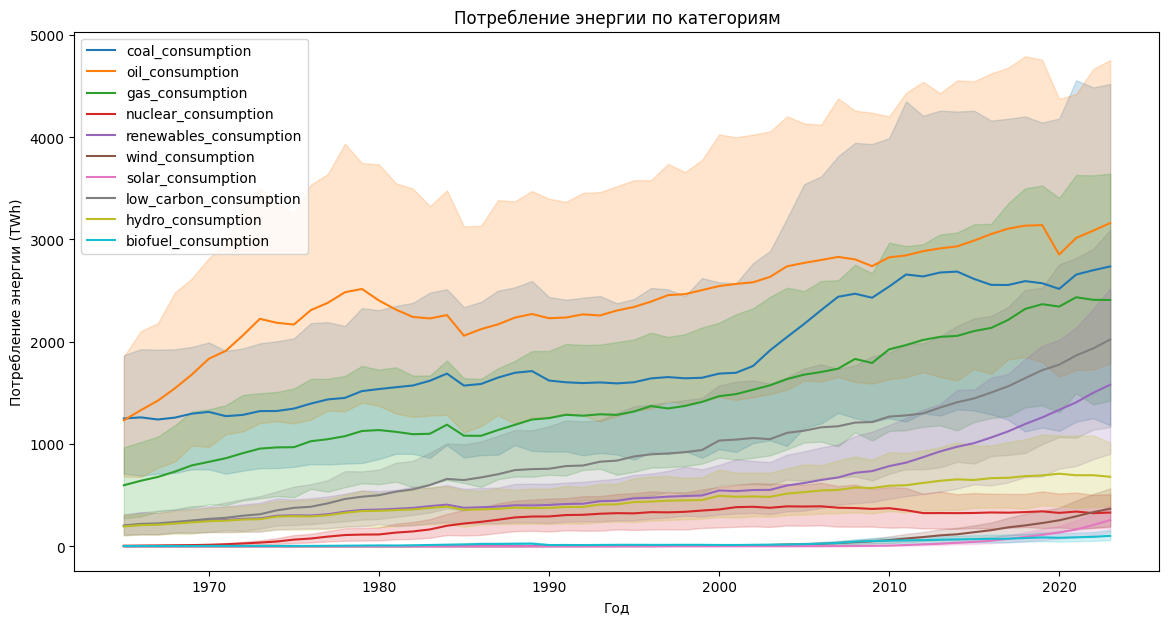

In [8]:
energy_types = ['coal_consumption', 'oil_consumption', 'gas_consumption', 'nuclear_consumption', 'renewables_consumption', 'wind_consumption', 'solar_consumption', 'low_carbon_consumption', 'hydro_consumption', 'biofuel_consumption']

plt.figure(figsize=(14, 7))
for energy_type in energy_types:
    sns.lineplot(data=df, x='year', y=energy_type, label=energy_type)
plt.title('Потребление энергии по категориям')
plt.xlabel('Год')
plt.ylabel('Потребление энергии (TWh)')
plt.legend()
plt.show()

График показывает динамику потребления энергии по различным категориям с 1965 по 2022 год. С 1965 года наблюдается устойчивый рост потребления энергии во всех категориях, что отражает увеличение глобального спроса на энергию. Потребление нефти значительно возросло в 1970-х годах и оставалось высоким, демонстрируя несколько колебаний. Наблюдается значительный рост потребления природного газа и угля, особенно начиная с 1990-х годов. Потребление энергии из возобновляемых источников, таких как ветер, солнце и гидроэнергия, начало заметно увеличиваться с 2000-х годов. В последние годы наблюдается значительный рост потребления низкоуглеродной энергии, что свидетельствует о глобальных усилиях по переходу на более экологически чистые источники энергии.

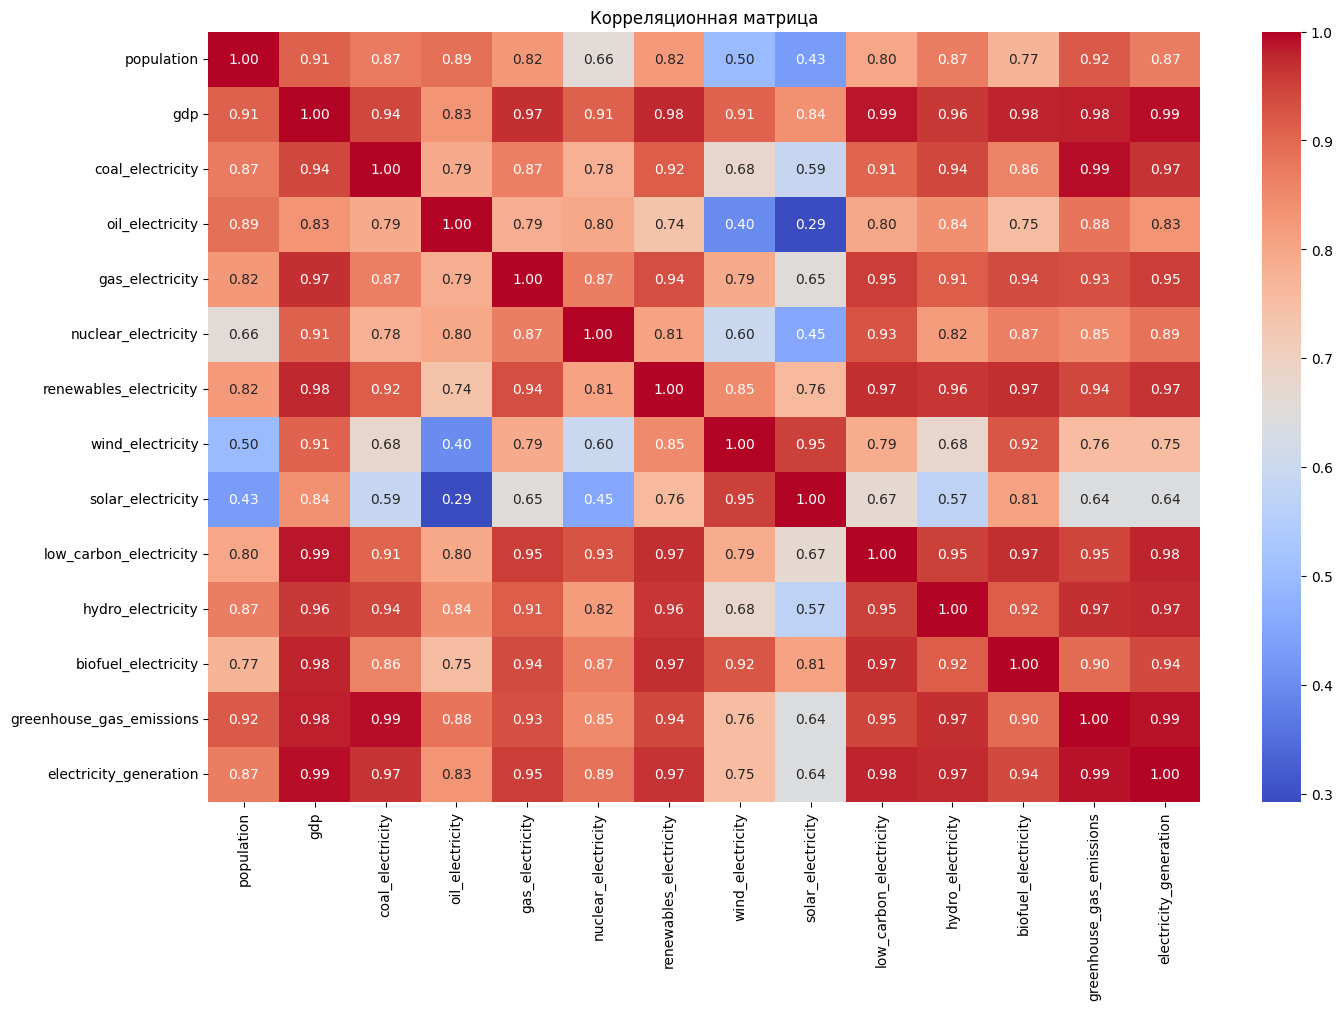

In [9]:
variables = [
    'population', 'gdp', 
    'coal_electricity', 'oil_electricity', 'gas_electricity', 'nuclear_electricity', 'renewables_electricity', 
    'wind_electricity', 'solar_electricity', 'low_carbon_electricity', 'hydro_electricity', 'biofuel_electricity', 
    'greenhouse_gas_emissions', 'electricity_generation'
]

# Отбор данных для нужных переменных
df_selected = df[variables]

# Вычисление корреляционной матрицы
corr_matrix = df_selected.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляционная матрица')
plt.show()

Корреляционная матрица показывает высокую положительную корреляцию между показателями ВВП и генерацией электроэнергии (разных видов), выбросами парниковых газов. Кажется, что в этом нет ничего удивительного. Средняя положительная корреляция наблюдается между численностью населения и показателем ВВП. Переменные, указывающие на генерацию экологически более чистых источников энергии, показывают низкую положительную корреляцию с переменными, указывающими на генерацию более "классических" источников энергии.

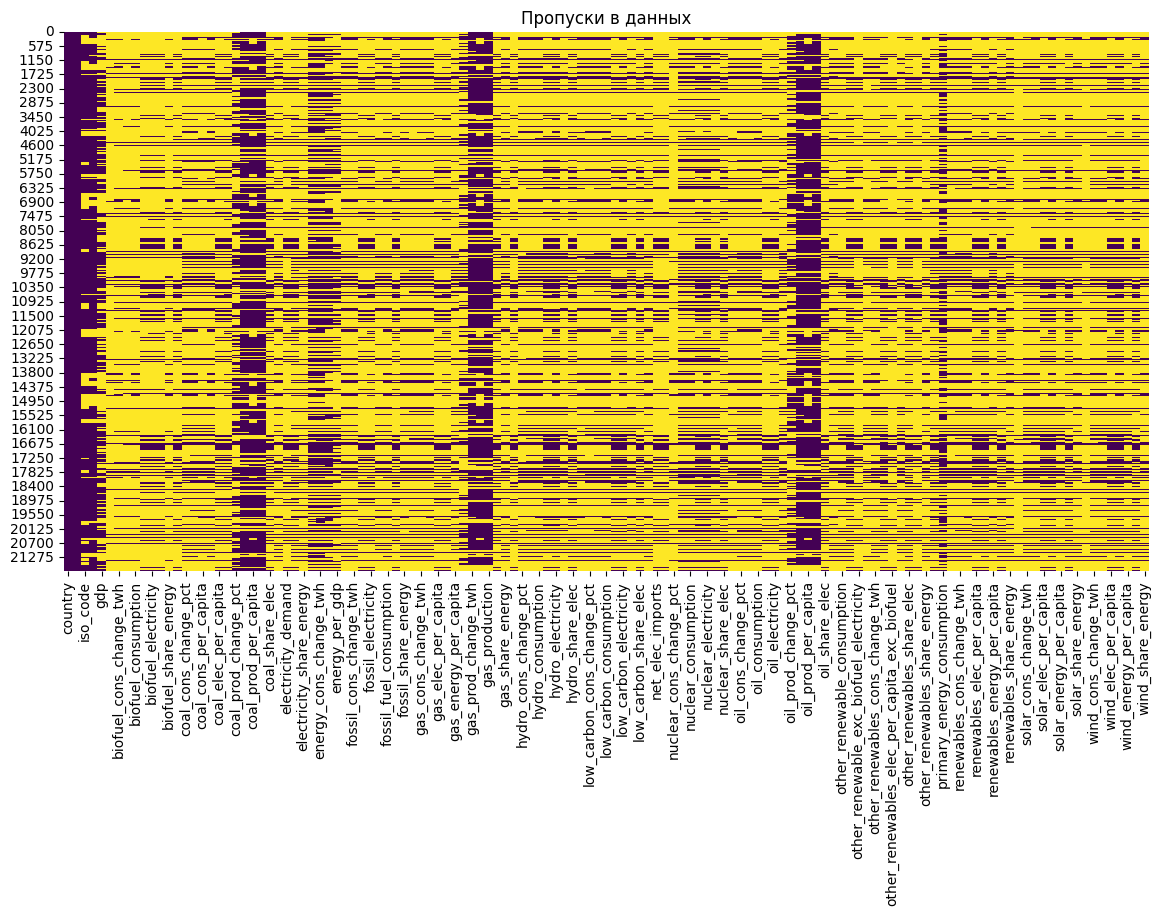

In [10]:
# Визуализация пропусков в данных
plt.figure(figsize=(14, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Пропуски в данных')
plt.show()


Посмотрим и на пропуски в данных. Некоторые переменные имеют значительное количество пропусков (фиолетовые участки графика). Эти переменные (в случае их использования) потребуют обработки. Дальше попробуем решить, что делать с этим.

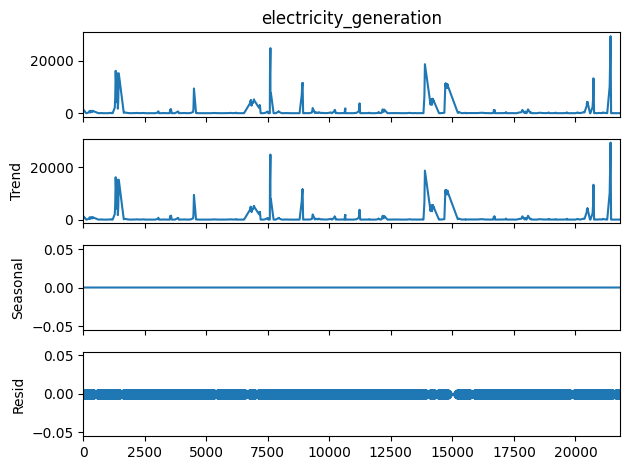

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['electricity_generation'].dropna(), model='additive', period=1)
result.plot()
plt.show()

Рассмотрим и предположение о сезонности в данных. С помощью библиотеки *seasonal_decompose* посмотрим декомпозицию временного ряда переменной *electricity_generation* (общий уровень генерации энергии) на три компонента: тренд, сезонность и остатки. 

Первый график показывает оригинальный временной ряд. Наблюдаются несколько резких пиков, что может указывать на значительные колебания в производстве электроэнергии в определенные моменты времени.

Второй график показывает долгосрочный тренд в данных. Трендовая линия следует за основными изменениями в генерации электроэнергии, показывая общее направление изменения без учета краткосрочных колебаний. Видно, что трендовая линия повторяет пики исходного ряда, что указывает на долгосрочные изменения в производстве энергии.

Третий график показывает сезонные колебания в данных. В данном случае сезонность практически отсутствует, так как линия сезонности находится на уровне 0, что указывает на отсутствие регулярных сезонных паттернов в данных о генерации электроэнергии.

Четвертый график показывает остаточные значения, которые представляют собой различия между исходными данными и суммой трендовой и сезонной компонент. Остатки показывают нерегулярные колебания, которые не объясняются трендом и сезонностью.

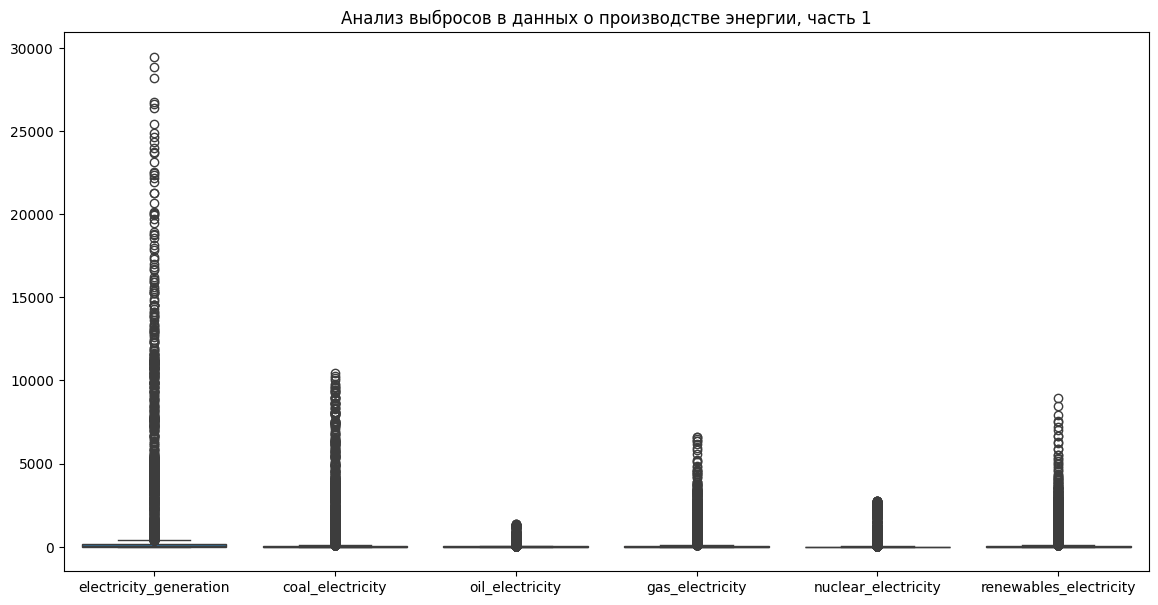

In [12]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['electricity_generation', 'coal_electricity', 'oil_electricity', 'gas_electricity', 'nuclear_electricity', 'renewables_electricity']])
plt.title('Анализ выбросов в данных о производстве энергии, часть 1')
plt.show()

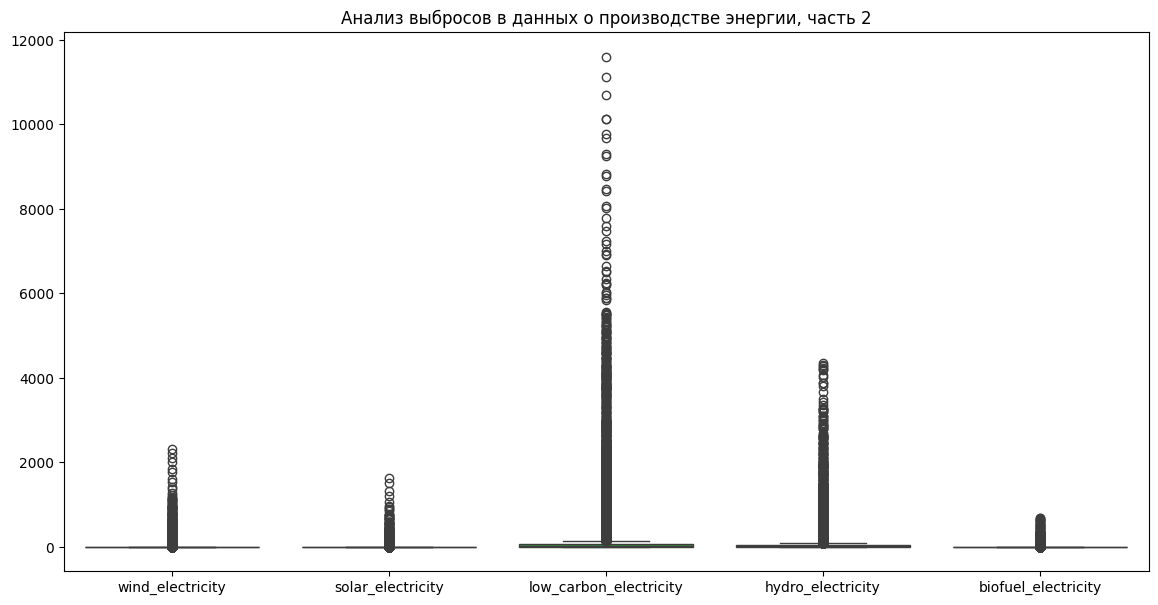

In [13]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['wind_electricity', 'solar_electricity', 'low_carbon_electricity', 'hydro_electricity', 'biofuel_electricity']])
plt.title('Анализ выбросов в данных о производстве энергии, часть 2')
plt.show()

Для всех источников энергии имеем высокое количество выбросов. Разные источники энергии показывают различные уровни стабильности и выбросов, что свидетельствует о специфических особенностях их производства и использования. Следует отметить, что наша выборка содержит огромное количество стран с совершенно разными возможностями к генерации энергии из разных источников. Вполне вероятно, что подобное наблюдение не является выбросом, а, наоборот, отражает разлия в уровне развития между странами.

#### Небольшая заметка о работе с выбросами 

Перед тем, как переходить к тяжелому решению об удалении выбросов следует пройти некоторый путь, ответив на важные вопросы:

* Эти выбросы могут являться ошибкой измерения?

* Эти выбросы представляют важные случаи в данных?

* Удаление выбросов хоть как-то приблизит нас к улучшению качества модели?

* Можем ли мы рассмотреть иные варианты?

* Если все предыдущие вопросы не остановили нас, то придется удалять, тщательно задокументировав это решение и проделанные шаги

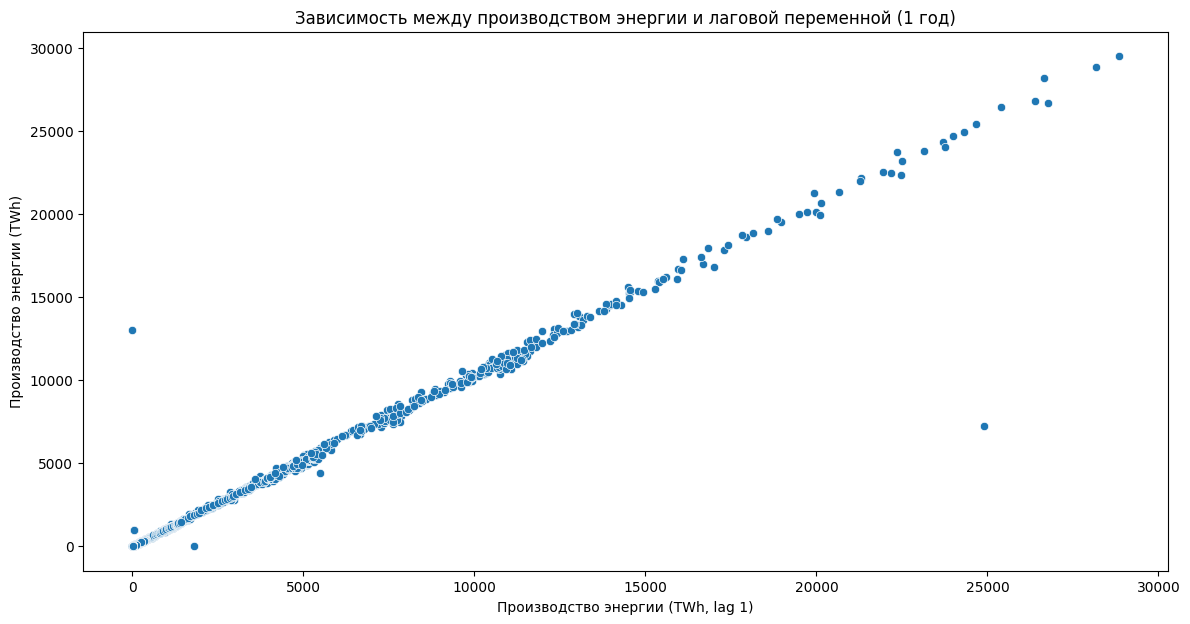

In [14]:
# Построение лаговых переменных
df['electricity_generation_lag1'] = df['electricity_generation'].shift(1)
df['electricity_generation_lag2'] = df['electricity_generation'].shift(2)

# df['coal_electricity_lag1'] = df['coal_electricity'].shift(1)
# df['coal_electricity_lag2'] = df['coal_electricity'].shift(2)

# Визуализация зависимости между производством энергии и лаговыми переменными
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='electricity_generation_lag1', y='electricity_generation')
# sns.scatterplot(data=df, x='coal_electricity_lag1', y='coal_electricity')
plt.title('Зависимость между производством энергии и лаговой переменной (1 год)')
plt.xlabel('Производство энергии (TWh, lag 1)')
plt.ylabel('Производство энергии (TWh)')
plt.show()


Напоследок посмотрим на лаговые переменные. Преимущественно будем смотреть на общий уровень производства энергии (компонентные переменные были проверены и показали примерно те же результаты). График показывает наличие сильной автокорреляции в данных.

#### Краткие выводы из EDA

1. Общие тренды в производстве и потреблении энергии:

- Наблюдается устойчивый рост как в производстве, так и в потреблении энергии за последние десятилетия.
- Переход от углеродных к возобновляемым и низкоуглеродным источникам энергии начался в 2000-х годах и продолжает набирать обороты.

2. Пиковые значения и изменения в производстве энергии:

- Значительные колебания в производстве энергии, особенно в категориях угля и нефти, могут быть связаны с экономическими кризисами, политическими изменениями или технологическими прорывами.
- Резкие изменения в конце 90-х и начале 2000-х годов могут быть связаны с экономическими кризисами или переходом к новым источникам энергии.

3. Корреляционный анализ:

- Высокая положительная корреляция между ВВП, генерацией электроэнергии и выбросами парниковых газов указывает на сильное влияние экономического роста на энергетический сектор.
- Некоторые переменные (например, солнечная и ветровая энергия) показывают низкую корреляцию с традиционными источниками энергии, что может указывать на их независимость и рост в новых условиях.

4. Пропуски в данных:

- Значительное количество пропусков в данных для некоторых переменных может потребовать дополнительной обработки.

5. Выбросы в данных:

- Анализ выбросов показал наличие значительных выбросов в категориях общей генерации электроэнергии, угольной и низкоуглеродной генерации.

6. Сезонность и тренды:

- В данных о генерации электроэнергии практически отсутствуют сезонные компоненты, что упрощает моделирование долгосрочных трендов.
- Трендовая компонента показывает общий рост производства электроэнергии с течением времени.

7. Автокорреляция в данных:

- Сильная линейная зависимость между текущим производством энергии и производством в предыдущем году указывает на высокую автокорреляцию в данных.

Теперь можно развлекаться с данными и переходить к выбору бейзлайн моделей.

### Выбор итогового набора данных. Предварительная обработка данных.


Определимся с итоговым набором переменных, которые мы будем использовать для моделирования.

В качестве целевой переменной будем использовать общую генерацию электроэнергии - *electricity_generation*.

Из большого количества переменных определимся с теми, которые могут иметь наибольшее влияние на целевую переменную. Будем учитывать и экономические, и энергетические показатели.

**Экономические признаки:**

1. population: Население
2. gdp: ВВП

**Энергетические признаки:**

3. coal_consumption: Потребление угля (TWh)
4. oil_consumption: Потребление нефти (TWh)
5. gas_consumption: Потребление природного газа (TWh)
6. nuclear_consumption: Потребление ядерной энергии (TWh)
7. renewables_consumption: Потребление возобновляемой энергии (TWh)
8. hydro_consumption: Потребление гидроэнергии (TWh)
9. solar_consumption: Потребление солнечной энергии (TWh)
10. wind_consumption: Потребление энергии ветра (TWh)
11. biofuel_consumption: Потребление биотоплива (TWh)

**Дополнительные признаки:**

12. energy_per_gdp: Энергоемкость (энергия на единицу ВВП)
13. greenhouse_gas_emissions: Выбросы углекислого газа (MtCO2)
14. electricity_demand: Спрос на электроэнергию (TWh)

In [15]:
import pandas as pd
import numpy as np

# Выбор необходимых признаков и целевой переменной
features = [
    'country','year', 'population', 'gdp', 'coal_consumption', 'oil_consumption',
    'gas_consumption', 'nuclear_consumption', 'renewables_consumption',
    'hydro_consumption', 'solar_consumption', 'wind_consumption',
    'biofuel_consumption', 'energy_per_gdp', 'greenhouse_gas_emissions', 'electricity_demand'
]
target = 'electricity_generation'

# Выбор данных для дальнейшей обработки
df_selected = df[features + [target]]

df_selected = df_selected[df_selected['year'] >= 1965]

print(df_selected)

             country  year  population           gdp  coal_consumption  \
0      ASEAN (Ember)  2000         NaN           NaN               NaN   
1      ASEAN (Ember)  2001         NaN           NaN               NaN   
2      ASEAN (Ember)  2002         NaN           NaN               NaN   
3      ASEAN (Ember)  2003         NaN           NaN               NaN   
4      ASEAN (Ember)  2004         NaN           NaN               NaN   
...              ...   ...         ...           ...               ...   
21807       Zimbabwe  2019  15354606.0  2.514642e+10               NaN   
21808       Zimbabwe  2020  15669663.0  2.317871e+10               NaN   
21809       Zimbabwe  2021  15993525.0  2.514009e+10               NaN   
21810       Zimbabwe  2022  16320539.0  2.590159e+10               NaN   
21811       Zimbabwe  2023  16665407.0           NaN               NaN   

       oil_consumption  gas_consumption  nuclear_consumption  \
0                  NaN              NaN        

Чтобы учесть структуру панельных данных и преобразовать текстовую переменную *country* в числовой формат, можно использовать кодирование порядковым методом (Ordinal Encoding). В данном случае каждая страна будет заменена уникальным числовым идентификатором.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Кодирование переменной 'country' порядковым методом
encoder = OrdinalEncoder()
df_selected['country_encoded'] = encoder.fit_transform(df_selected[['country']])

# Удаление оригинальной переменной 'country'
df_selected = df_selected.drop(columns=['country'])

# Проверка результата
print(df_selected.head())

   year  population  gdp  coal_consumption  oil_consumption  gas_consumption  \
0  2000         NaN  NaN               NaN              NaN              NaN   
1  2001         NaN  NaN               NaN              NaN              NaN   
2  2002         NaN  NaN               NaN              NaN              NaN   
3  2003         NaN  NaN               NaN              NaN              NaN   
4  2004         NaN  NaN               NaN              NaN              NaN   

   nuclear_consumption  renewables_consumption  hydro_consumption  \
0                  NaN                     NaN                NaN   
1                  NaN                     NaN                NaN   
2                  NaN                     NaN                NaN   
3                  NaN                     NaN                NaN   
4                  NaN                     NaN                NaN   

   solar_consumption  wind_consumption  biofuel_consumption  energy_per_gdp  \
0                NaN     

In [17]:
# Проверка на пропущенные значения и замена их на медиану
df_selected = df_selected.fillna(df_selected.median())

# Проверка результата
print(df_selected.head())

   year  population           gdp  coal_consumption  oil_consumption  \
0  2000   7086993.0  5.738825e+10            68.932          222.539   
1  2001   7086993.0  5.738825e+10            68.932          222.539   
2  2002   7086993.0  5.738825e+10            68.932          222.539   
3  2003   7086993.0  5.738825e+10            68.932          222.539   
4  2004   7086993.0  5.738825e+10            68.932          222.539   

   gas_consumption  nuclear_consumption  renewables_consumption  \
0          125.469                  0.0                  46.549   
1          125.469                  0.0                  46.549   
2          125.469                  0.0                  46.549   
3          125.469                  0.0                  46.549   
4          125.469                  0.0                  46.549   

   hydro_consumption  solar_consumption  wind_consumption  \
0             35.767                0.0             0.008   
1             35.767                0.0   

Избавились от пропущенных данных путем заполнения медианой. Данный подход позволит сохранить распределение данных и является более устойчивым к выбросам. Теперь непосредственно к выбросам.

In [18]:
# Выявление выбросов и их подсчет
def count_outliers(df):
    outliers_count = {}
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers_count[column] = len(outliers)
    return outliers_count

outliers_count = count_outliers(df_selected)

# Вывод количества выбросов для каждого признака и общее количество строк в датасете
print("Количество выбросов для каждого признака:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

print(f"\nОбщее количество строк в датасете: {len(df_selected)}")

Количество выбросов для каждого признака:
year: 0
population: 2135
gdp: 2550
coal_consumption: 5518
oil_consumption: 5814
gas_consumption: 5312
nuclear_consumption: 2534
renewables_consumption: 5574
hydro_consumption: 5574
solar_consumption: 2260
wind_consumption: 4836
biofuel_consumption: 2876
energy_per_gdp: 4828
greenhouse_gas_emissions: 5861
electricity_demand: 5862
electricity_generation: 5764
country_encoded: 0

Общее количество строк в датасете: 14142


Выбросов действительно много. Тем не менее, мы настаиваем на том, что подобный кейс описывает реальные данные. Энергетические сектор является одним из ярких примеров подобного явления, где данные могут значительно различаться между странами и годами. Кроме того, различные экономические кризисы, политические события и технологические прорывы могут приводить к временным экстремальным значениям в данных. Мы также можем использовать модели, устойчивые к выбросам.

### Построение и оценка качества базовой модели (бейзлайна)

В рамках выполнения данной задачи следует обозначить план наших действий:

1. **Подготовка данных**

- Разделение данных на обучающую и тестовую выборки
- Стандартизация данных
- Определение качества константного предсказания

2. **Выбор базовых моделей**

3. **Обучение моделей**

4. **Оценка качества моделей**

5. **Анализ результатов**

6. **Документирование результатов**

- Документация процесса подготовки данных, выбора бейзлайна, обучения моделей, оценки качества и анализа результатов

#### Подготовка данных

##### Разделение выборки

Начнем с разделения выборки на обучающую и тестовую с использованием *scikit-learn*. Разделим выборку в соотношении 80/20: 80% данных для обучения и 20% для тестирования.

In [20]:
from sklearn.model_selection import train_test_split

# Определение признаков и целевой переменной
X = df_selected.drop(columns=[target])
y = df_selected[target]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### Стандартизация данных

Поскольку мы будем использовать как линейные модели (где стандартизация важна), так и модели на основе деревьев (где стандартизация необязательна), стандартизация будет полезна для обеспечения согласованности данных. Используем "классический" *StandardScaler*.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Определение качества константного предсказания

Определение качества константного предсказания может быть полезно для оценки производительности моделей машинного обучения. Константное предсказание может служить нижней границей для качества модели, с которой можно сравнивать другие модели. Константное предсказание обычно основывается на средних или медианных значениях целевой переменной. Это простая модель, которая предсказывает одно и то же значение для всех наблюдений.

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mean_target = y_train.mean()
y_test_pred_constant = np.full_like(y_test, fill_value=mean_target)

print("Качество константного предсказания:")
print("Test RMSE:", mean_squared_error(y_test, y_test_pred_constant, squared=False))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred_constant))
print("Test R^2:", r2_score(y_test, y_test_pred_constant))

Качество константного предсказания:
Test RMSE: 1864.4494524474806
Test MAE: 708.1587488481377
Test R^2: -1.1093285780860995e-05


c:\Users\dima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### Выбор бейзлайна

В качестве бейзлайна будем использовать линейную регрессию как наиболее распространенную и простую модель машинного обучения. У нее есть несколько преимуществ:

1. Простота и интерпретируемость
2. Быстрое обучение и предсказание
3. Является базовым ориентиром для сравнения
4. Простой анализ признаков
5. Устойчивость к мультиколлинеарности

#### Обучение и оценка модели

Наконец перейдем к обучению моделей. Как уже было сказано ранее, используем линейную регрессию. Попробуем также оценить время, затраченное на обучение модели, чтобы потом сравнить их не только по метрикам, но и по вычислительной эффективности.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Обучение модели линейной регрессии и измерение времени обучения
model = LinearRegression()
start_time = time.time()
model.fit(X_train_scaled, y_train)
end_time = time.time()

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Время, затраченное на обучение: {end_time - start_time} секунд")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Время, затраченное на обучение: 0.005998849868774414 секунд
Mean Squared Error (MSE): 349276.59765974054
Root Mean Squared Error (RMSE): 590.996275504119
Mean Absolute Error (MAE): 187.43593935076962
R-squared (R²): 0.8995215149520305


#### Предварительные выводы

Линейная регрессия значительно улучшает метрики по сравнению с константным предсказанием. *RMSE* и *MAE* для линейной регрессии значительно ниже, что указывает на более точные предсказания. $R^2$ для линейной регрессии близко к 1, что указывает на хорошую объясняющую способность модели, в то время как $R^2$ для константного предсказания отрицательное, что свидетельствует о том, что эта модель не объясняет дисперсию данных. Линейная регрессия показала себя как эффективная модель для начального этапа анализа, обеспечивая значительное улучшение по сравнению с наивным предсказанием.

#### Анализ результатов

В данном разделе сосредоточимся на двух важных пунктах: оценке важности признаков и анализе ошибок предсказания.

##### Важность признаков

Как уже мы заметили ранее, для линейной регрессии можно легко получить информацию о важности признаков. Линейная регрессия предоставляет для этого атрибут feature_importances, который показывает, насколько важен каждый признак для принятия решения моделью.

Важность признаков:
renewables_consumption      1723.989854
electricity_demand          1391.949243
coal_consumption             704.088813
nuclear_consumption          573.873577
solar_consumption            265.572108
gas_consumption              215.338196
year                          32.702766
energy_per_gdp                -9.043666
country_encoded              -12.659777
biofuel_consumption          -34.739079
gdp                          -89.196811
greenhouse_gas_emissions    -154.436708
population                  -404.360040
oil_consumption             -563.228985
hydro_consumption           -818.097889
wind_consumption            -926.132038
dtype: float64


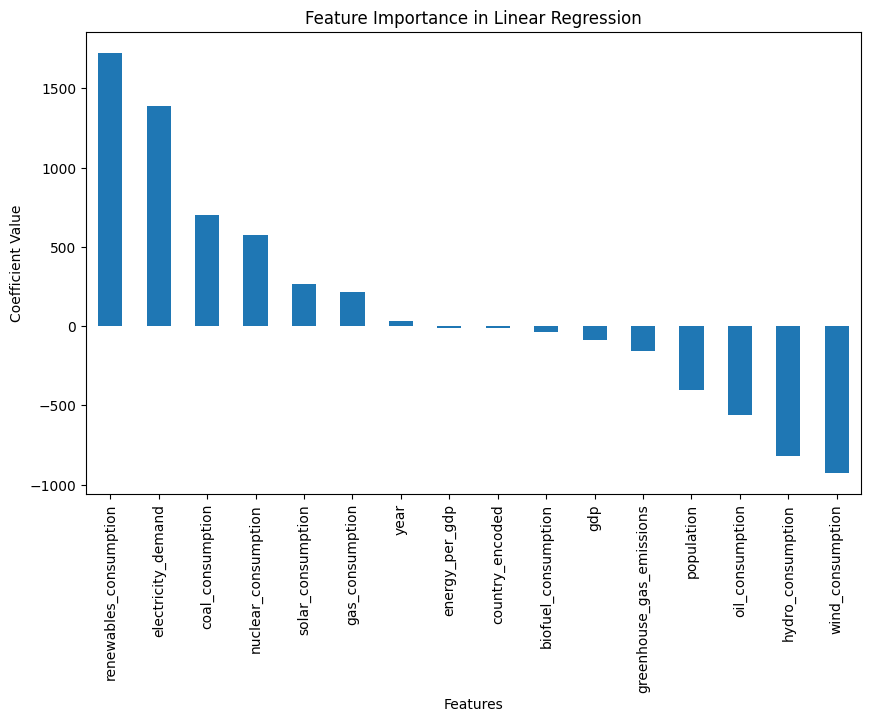

In [26]:
# Оценка важности признаков
coefficients = model.coef_
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

# Вывод важности признаков
print("Важность признаков:")
print(feature_importance)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


Потребление возобновляемых источников энергии и спрос на электроэнергию являются ключевыми драйверами генерации электроэнергии. Потребление угля и ядерной энергии также значительно влияет на генерацию электроэнергии. Некоторые признаки, такие как гидро- и ветровая энергия, потребление нефти и население, оказывают значительное отрицательное влияние. Общие экономические показатели, такие как ВВП и выбросы парниковых газов, оказывают отрицательное влияние, что может свидетельствовать о переходе к более экологичным и экономически эффективным источникам энергии.

##### Анализ ошибок предсказания
Для анализа ошибок предсказания используем диаграмму Actual vs Predicted Values, которая показывает, насколько хорошо модель справляется с предсказаниями.

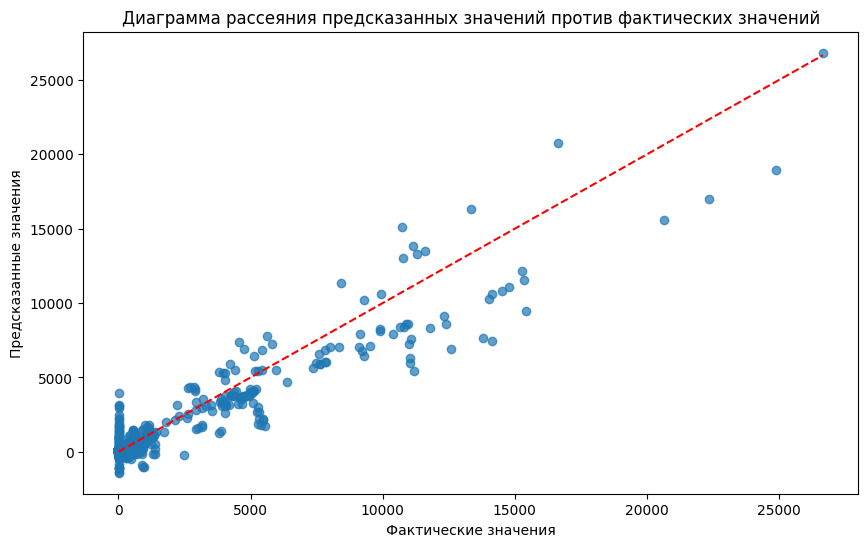

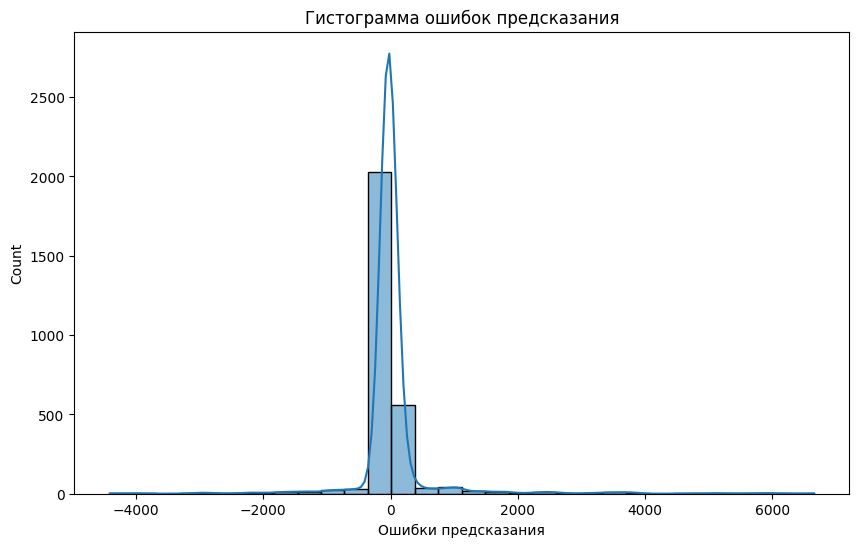

Средняя ошибка: 27.458887288843545
Стандартное отклонение ошибки: 590.3580330346994
Медиана ошибки: -29.519864660599495
Минимальная ошибка: -4414.811840429164
Максимальная ошибка: 6657.506766949469


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Вычисление остатков (errors)
errors = y_test - y_pred

# Диаграмма рассеяния предсказанных значений против фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Диаграмма рассеяния предсказанных значений против фактических значений')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.show()

# Гистограмма остатков
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30)
plt.xlabel('Ошибки предсказания')
plt.title('Гистограмма ошибок предсказания')
plt.show()

# Вывод основных статистик по ошибкам
error_mean = np.mean(errors)
error_std = np.std(errors)
error_median = np.median(errors)
error_min = np.min(errors)
error_max = np.max(errors)

print(f"Средняя ошибка: {error_mean}")
print(f"Стандартное отклонение ошибки: {error_std}")
print(f"Медиана ошибки: {error_median}")
print(f"Минимальная ошибка: {error_min}")
print(f"Максимальная ошибка: {error_max}")


Большинство точек располагаются вдоль диагональной линии, что указывает на достаточно хорошее соответствие между фактическими и предсказанными значениями. Тем не менее, наблюдаются отклонения при более высоких значениях, что может указывать на наличие некоторых трудностей модели в точном предсказании больших значений. Ошибки распределены симметрично вокруг нуля, что говорит о том, что модель в среднем не имеет систематической ошибки (т.е. не переоценивает и не недооценивает значения). Большинство ошибок сконцентрированы вокруг нуля, что является положительным знаком. Наличие длинных хвостов указывает на некоторые экстремальные ошибки, которые могут быть результатом выбросов или особенностей данных.

#### Куда двигаемся дальше

1. **Исследуем более сложные модели**

Попробуем более сложные модели ().

2. **Оцениваем их производительность и делаем выводы**

Сравниваем между собой и с линейной регрессией.

3. **Играемся с оптимизацией гиперпараметров**

### Построение и оценка более сложных моделей

#### Теоретическая выкладка о разных моделях (поменьше)

#### Теоретическая выкладка о разных моделях (побольше)

##### Какой механизм у градиентного бустинга под капотом

Градиентный бустинг строит модель предсказания путем последовательного добавления к ансамблю новых моделей, каждая из которых корректирует ошибки, сделанные всеми предыдущими моделями вместе взятыми.

1. **Инициализация:**
- Градиентный бустинг начинается с простой модели, которая может быть просто средним значением целевой переменной (для регрессии) или логарифмом отношения количества положительных и отрицательных примеров (для классификации).

2. **Цикл построения моделей:**

- На каждом шаге вычисляются остатки - разницы между предсказанными и истинными значениями целевой переменной.
- Строится новая модель (обычно решающее дерево), которая предсказывает эти остатки для обучающих данных.
- Предсказания новой модели умножаются на коэффициент (скорость обучения) и добавляются к предсказаниям ансамбля, тем самым корректируя его ошибки.

3. **Функция потерь и её градиент:**

- Градиентный бустинг оптимизирует произвольную дифференцируемую функцию потерь. На каждом шаге модель строится так, чтобы её предсказания были направлены на уменьшение этой функции потерь, что достигается путем движения в направлении её антиградиента.

Этот процесс повторяется многократно, и с каждой новой моделью общая ошибка ансамбля уменьшается, что приводит к созданию мощной композитной модели, способной к точным предсказаниям.

##### Математическое представление градиентного бустинга

Допустим, у нас есть функция потерь $L(y, F(x))$, где $y$ - истинные значяения, а $F(x)$ - предсказания модели. Градиентный бустинг стремится минимизировать эту функцию потерь, последовательно добавляя к ансамблю модели $h$, которые аппроксимируют антиградиент функции потерь по предсказаниям текущего ансамбля: 

$F_t (x) = F_{t-1} (x) + p_t h_t (x)$

- $F_t (x)$ - предсказания ансамбля после добавления $t$-й модели
- $h_t (x)$ - предсказания $t$-й модели
- $p_t$ - оптимальный коэффициент для $t$-й модели, обычно находится методом одномерной оптимизации

#### Обучение моделей

С теоретией на сегодня все, теперь перейдем к практике и самому интересному - обучению моделей. Начнем по порядку, с градиентного бустинга.

##### Gradient Boosting

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Обучение модели градиентного бустинга
model = GradientBoostingRegressor(random_state=55)
start_time = time.time()
model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

# Прогнозирование на тестовой выборке
y_test_pred = model.predict(X_test_scaled)

# Оценка модели
train_rmse = mean_squared_error(y_train, model.predict(X_train_scaled), squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_mae = mean_absolute_error(y_train, model.predict(X_train_scaled))
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, model.predict(X_train_scaled))
test_r2 = r2_score(y_test, y_test_pred)

# Вывод результатов
print(f"Gradient Boosting Model:")
print(f"Training Time: {training_time} seconds")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}")
print(f"Test MAE: {test_mae}")
print(f"Train R^2: {train_r2}")
print(f"Test R^2: {test_r2}")

Gradient Boosting Model:
Training Time: 3.3344075679779053 seconds
Train RMSE: 89.41444395613316
Test RMSE: 190.7877970471928
Train MAE: 28.75204116204073
Test MAE: 42.16393600703662
Train R^2: 0.9978086739242586
Test R^2: 0.9903306569886237


c:\Users\dima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\dima\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Модель градиентного бустинга показывает отличные результаты как на обучающей, так и на тестовой выборке. Низкие значения *RMSE* и *MAE* на тестовой выборке указывают на то, что модель успешно предсказывает значения целевой переменной. Высокое значение $R^2$ на обучающей выборке может свидетельствовать о переобучении, однако значение $R^2$ на тестовой выборке также очень высокое, что уменьшает вероятность сильного переобучения. Модель хорошо обобщает данные. По сравнению с константной моделью и линейной регрессией, градиентный бустинг значительно улучшает показатели ошибок предсказания и коэффициента детерминации, что подтверждает его эффективность.

*Примечание:* для улучшения точности предсказания мы могли бы провести настройку гиперпараметров с использованием сеточного поиска или байесовской оптимизации, но мы предлагаем двигаться к следующим моделям, поскольку даже текущая модель показывает отличные результаты.

##### Анализ результатов

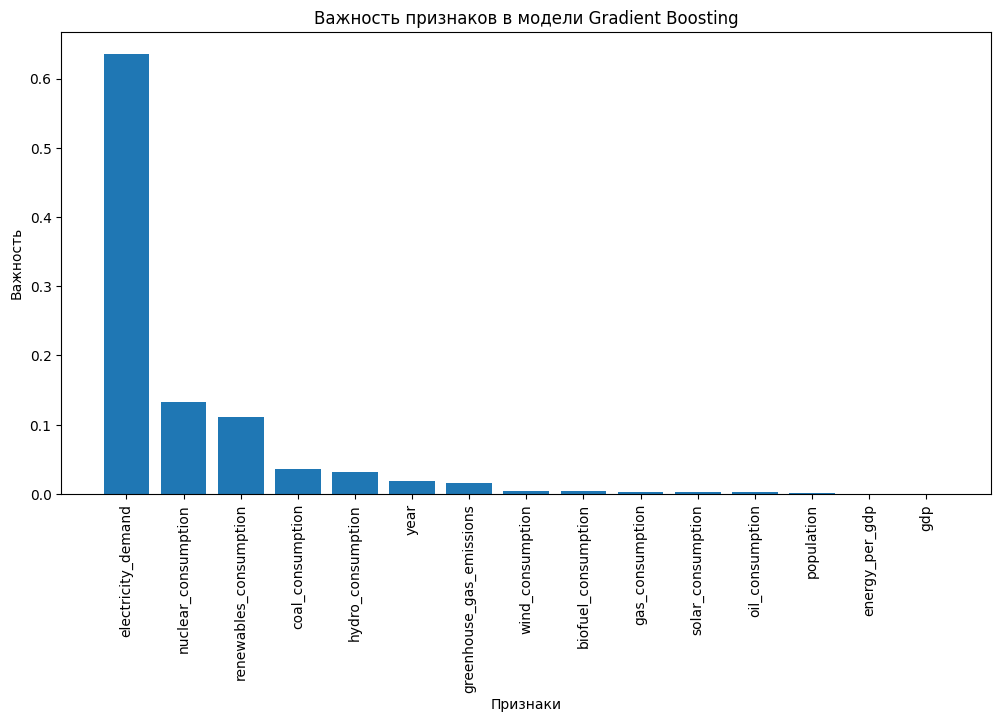

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Вычисление важности признаков
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.title("Важность признаков в модели Gradient Boosting")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.show()

В модели Градиентного бустинга получаем уже другие результаты. Наиболее важным признаком здесь оказалась переменная, определяющая спрос на электроэнергию, далее следуют потребление ядерной и возобновляемой энергии.

##### Анализ результатов

### Выводы и дальнейшие шаги


Еще раз проговорим, зачем мы вообще это все делали и куда это применить.

